# Analyse einer Twitter-Abfrage zun Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import sys 
sys.path.append('..')
from transform.read_transform import read_transform

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets

os.chdir("../data")
file_tw = 'TW' 
file_rt = 'RT'
tweets_df = pd.read_csv(file_tw + '.csv')
retweets_df = pd.read_csv(file_rt + '.csv')

In [3]:
print('tweets shape: ',tweets_df.shape)
print('retweets shape: ',retweets_df.shape)

tweets shape:  (37747, 20)
retweets shape:  (10512, 21)


In [4]:
data = read_transform(path_tweets='../data/TW.csv', path_retweets='../data/RT.csv',
join_method='concat',
hashtags_as_list=False, mentions_as_list=False)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.groupby('is_retweet').count()['tweet_id']

is_retweet
False    13673
True     30661
Name: tweet_id, dtype: int64

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

### * Tweets

In [7]:
# 1000 Gesammelte Tweets
## Primärschlüssel tweet_id
print(tweets_df.shape)
print(type(tweets_df))
tweets_df.head(4)

(37747, 20)
<class 'pandas.core.frame.DataFrame'>


Unnamed: 0  Unnamed: 0.1              creation_date  \
0           0             0  2021-04-01 02:06:11+00:00   
1           1             1  2021-04-01 02:06:03+00:00   
2           2             2  2021-04-01 02:05:30+00:00   
3           3             3  2021-04-01 02:04:03+00:00   

                                         description  \
0       I retweet #Anime stuff🔥 Follow for a cookie🍪   
1                                                NaN   
2  NYT/#1 int'l bestselling author THOSE WHO SAVE...   
3  NY 🗽 God First⛪️ FX Trader | Real Estate Inves...   

                                   entities_hashtags  favourite_count  \
0          anime, food, animefood, hungry, 백종원, 고든램지                0   
1                           Food, FoodPorn, FoodPorn                0   
2                            poetry, food, PoetsCafe                0   
3  PrivateLocation, Food, Games, Music, Vibes, Ho...                0   

   followers_count  friends_count  \
0             5064              1   
1            16037           9925   
2             6090            758   
3              822            801   

                                           full_text    location  \
0  RT @byOceanEyes: OceanEyes\r\nonly for anime f...   Animeland   
1  Might not look as appetizing as other posts, b...         NaN   
2  Come for the #poetry, stay for the #food—or vi...  Boston, MA   
3  @MrsFreshFeet TRAP x GRITS \r\nTHE SEQUEL\r\n\...  Upstate NY   

                      mentions         profile_created_at  protected  \
0                'byOceanEyes'  2018-07-24 18:53:54+00:00      False   
1                          NaN  2015-08-01 07:11:08+00:00      False   
2  'AMIGHTYBLAZE', 'fascicles'  2009-09-02 04:30:11+00:00      False   
3               'MrsFreshFeet'  2019-04-21 22:52:42+00:00      False   

   retweet_count search_key             tweet_id              user_id  \
0            115      #food  1377442135604084742  1021830850357473280   
1              0      #food  1377442100900421632           3303170203   
2              0      #food  1377441963746721796             70882212   
3              0      #food  1377441598552698881  1120098059956961280   

        user_name user_screen_name  is_retweet  
0    RE:AnimeTron      ReAnimetron        True  
1  Dining Cooking    DiningCooking       False  
2      Jenna Blum       Jenna_Blum       False  
3              TB        tbevents_       False

In [8]:
tweets_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'creation_date', 'description',
       'entities_hashtags', 'favourite_count', 'followers_count',
       'friends_count', 'full_text', 'location', 'mentions',
       'profile_created_at', 'protected', 'retweet_count', 'search_key',
       'tweet_id', 'user_id', 'user_name', 'user_screen_name', 'is_retweet'],
      dtype='object')

In [9]:
#Filter
tw_rtcount = tweets_df[tweets_df['retweet_count'] >= 1]
tw_rtcount.head(3)

Unnamed: 0  Unnamed: 0.1              creation_date  \
0           0             0  2021-04-01 02:06:11+00:00   
5           5             5  2021-04-01 02:02:21+00:00   
8           8             8  2021-04-01 02:01:28+00:00   

                                         description  \
0       I retweet #Anime stuff🔥 Follow for a cookie🍪   
5  Mujer, mexicana, feminista, emprendedora socia...   
8  https://t.co/2DGAgeKzSQ - #Author - Addicted t...   

                                   entities_hashtags  favourite_count  \
0          anime, food, animefood, hungry, 백종원, 고든램지                0   
5  Water, Energy, Community, Waste, Infrastructur...                0   
8  Vietnam, Agriculture, Stocks, Investment, Dair...                0   

   followers_count  friends_count  \
0             5064              1   
5             1035            809   
8             1277           1926   

                                           full_text   location  \
0  RT @byOceanEyes: OceanEyes\r\nonly for anime f...  Animeland   
5  RT @mherrera68: Including actions in diverse a...        NaN   
8  RT @5stocksinto: 5 Vietnamese Stocks Into Dair...  WorldWide   

        mentions         profile_created_at  protected  retweet_count  \
0  'byOceanEyes'  2018-07-24 18:53:54+00:00      False            115   
5   'mherrera68'  2009-09-01 04:52:12+00:00      False              1   
8  '5stocksinto'  2016-08-03 03:12:05+00:00      False             39   

  search_key             tweet_id              user_id     user_name  \
0      #food  1377442135604084742  1021830850357473280  RE:AnimeTron   
5      #food  1377441169391558661             70601277   Alicia Leal   
8      #food  1377440948930551811   760674570458140673   Andrew Duff   

  user_screen_name  is_retweet  
0      ReAnimetron        True  
5       lealalicia        True  
8      5stocksinto        True

In [10]:
# Filter
id_tw = 1372585147183239170
tweets_filt = tweets_df.loc[tweets_df['tweet_id'] == id_tw]
tweets_filt

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, creation_date, description, entities_hashtags, favourite_count, followers_count, friends_count, full_text, location, mentions, profile_created_at, protected, retweet_count, search_key, tweet_id, user_id, user_name, user_screen_name, is_retweet]
Index: []

In [11]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 17826 
-> ihre tweets 34464 
-> followers max 4317232 avg 5532.350862320184 median 709.0 
-> friends max 299379 
-> gefällt mir max 593 median 0.0


### * Retweets

In [12]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(10512, 21)


Unnamed: 0  Unnamed: 0.1             RT_of_ID              creation_date  \
0           0             0  1377439875343900677  2021-04-01 02:00:40+00:00   
1           1             1  1377439875343900677  2021-04-01 01:58:21+00:00   
2           2             2  1377436766815232001  2021-04-01 01:58:21+00:00   

                                         description  \
0  Esports Retweets. Supporting Esports Worldwide...   
1  We are https://t.co/UvEf6OC6d2 your free and e...   
2  katanya sih desainer grafis.. tapi bisanya bik...   

                                   entities_hashtags  favourite_count  \
0  ApexLegends, doggo, cam, apex, twitch, tiktok,...                0   
1  ApexLegends, doggo, cam, apex, twitch, tiktok,...                0   
2  logoforsale, logos, logoinspiration, chef, foo...                0   

   followers_count  friends_count  \
0             3552              3   
1              241           1091   
2              227            857   

                                           full_text  ...  \
0  RT @ItsVanBaby: 🔴LIVE - TWITCHH Y U TAKE MY JA...  ...   
1  RT @ItsVanBaby: 🔴LIVE - TWITCHH Y U TAKE MY JA...  ...   
2  RT @Mohhative: Running Chef Logo is available ...  ...   

                    mentions         profile_created_at protected  \
0               'ItsVanBaby'  2015-04-30 20:34:46+00:00     False   
1               'ItsVanBaby'  2021-03-12 20:15:31+00:00     False   
2  'Mohhative', 'LogoGround'  2010-09-21 10:09:49+00:00     False   

   retweet_count  search_key             tweet_id              user_id  \
0              2       #food  1377440748329574400           3180931062   
1              2       #food  1377440166504202243  1370468115402866691   
2              1       #food  1377440164889305088            193239717   

          user_name user_screen_name is_retweet  
0       Esports RTs   EsportsTweeter       True  
1  The ROM's Monkey       romsmonkey       True  
2        bebas neue         _sanz24_       True  

[3 rows x 21 columns]

In [13]:
retweets_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'RT_of_ID', 'creation_date',
       'description', 'entities_hashtags', 'favourite_count',
       'followers_count', 'friends_count', 'full_text', 'location', 'mentions',
       'profile_created_at', 'protected', 'retweet_count', 'search_key',
       'tweet_id', 'user_id', 'user_name', 'user_screen_name', 'is_retweet'],
      dtype='object')

In [14]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 5330 
-> ihre retweets 9870 
-> retweets Median 3.0  nur 10% haben mehr als 26.0  retweets  - max 382 
-> followers max 490965  nur 10% haben mehr als  8063.0 followers 
-> friends max 199103


In [15]:
common_col = tweets_df.columns.intersection(retweets_df.columns)
print(common_col)

diff_col = retweets_df.columns.difference(tweets_df.columns)
print(diff_col)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'creation_date', 'description',
       'entities_hashtags', 'favourite_count', 'followers_count',
       'friends_count', 'full_text', 'location', 'mentions',
       'profile_created_at', 'protected', 'retweet_count', 'search_key',
       'tweet_id', 'user_id', 'user_name', 'user_screen_name', 'is_retweet'],
      dtype='object')
Index(['RT_of_ID'], dtype='object')


### * Merged

In [16]:
# Joinen der beiden DF mit Left-Join 
#df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
#df.head(3)

In [17]:
# Joinen
df = pd.merge(tweets_df, retweets_df, left_on='tweet_id', right_on='RT_of_ID')
df.head(3)

Unnamed: 0_x  Unnamed: 0.1_x            creation_date_x  \
0            21              21  2021-04-01 01:57:12+00:00   
1            21              21  2021-04-01 01:57:12+00:00   
2            54              54  2021-04-01 01:44:51+00:00   

                                       description_x  \
0  LA based FPS and MMO Twitch Streamer with a ha...   
1  LA based FPS and MMO Twitch Streamer with a ha...   
2  A Logo Designer from Indonesia\r\n\r\nYou can ...   

                                 entities_hashtags_x  favourite_count_x  \
0  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   
1  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   
2  logoforsale, logos, logoinspiration, chef, foo...                  0   

   followers_count_x  friends_count_x  \
0                148              193   
1                148              193   
2                 27               47   

                                         full_text_x       location_x  ...  \
0  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   
1  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   
2  Running Chef Logo is available on @LogoGround ...              NaN  ...   

                  mentions_y       profile_created_at_y  protected_y  \
0               'ItsVanBaby'  2015-04-30 20:34:46+00:00        False   
1               'ItsVanBaby'  2021-03-12 20:15:31+00:00        False   
2  'Mohhative', 'LogoGround'  2010-09-21 10:09:49+00:00        False   

   retweet_count_y search_key_y           tweet_id_y            user_id_y  \
0                2        #food  1377440748329574400           3180931062   
1                2        #food  1377440166504202243  1370468115402866691   
2                1        #food  1377440164889305088            193239717   

        user_name_y user_screen_name_y  is_retweet_y  
0       Esports RTs     EsportsTweeter          True  
1  The ROM's Monkey         romsmonkey          True  
2        bebas neue           _sanz24_          True  

[3 rows x 41 columns]

In [18]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'creation_date_x', 'description_x',
       'entities_hashtags_x', 'favourite_count_x', 'followers_count_x',
       'friends_count_x', 'full_text_x', 'location_x', 'mentions_x',
       'profile_created_at_x', 'protected_x', 'retweet_count_x',
       'search_key_x', 'tweet_id_x', 'user_id_x', 'user_name_x',
       'user_screen_name_x', 'is_retweet_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y',
       'RT_of_ID', 'creation_date_y', 'description_y', 'entities_hashtags_y',
       'favourite_count_y', 'followers_count_y', 'friends_count_y',
       'full_text_y', 'location_y', 'mentions_y', 'profile_created_at_y',
       'protected_y', 'retweet_count_y', 'search_key_y', 'tweet_id_y',
       'user_id_y', 'user_name_y', 'user_screen_name_y', 'is_retweet_y'],
      dtype='object')

In [19]:
df.describe()

Unnamed: 0_x  Unnamed: 0.1_x  favourite_count_x  followers_count_x  \
count  11513.000000    11513.000000       11513.000000       1.151300e+04   
mean   18975.604534     6947.231304          22.978112       2.760874e+04   
std    10982.351266     4964.475635          53.350436       1.393198e+05   
min       21.000000        2.000000           0.000000       0.000000e+00   
25%     8702.000000     2680.000000           1.000000       4.330000e+02   
50%    19361.000000     5671.000000           5.000000       2.936000e+03   
75%    28629.000000    10379.000000          18.000000       1.072300e+04   
max    37737.000000    18265.000000         593.000000       4.317232e+06   

       friends_count_x  retweet_count_x    tweet_id_x     user_id_x  \
count     11513.000000     11513.000000  1.151300e+04  1.151300e+04   
mean       5044.740207        11.155563  1.378376e+18  4.978990e+17   
std       11310.584978        27.824943  1.393391e+15  5.680747e+17   
min           0.000000         0.000000  1.374538e+18  1.223101e+06   
25%         285.000000         1.000000  1.377261e+18  2.500878e+08   
50%        1296.000000         3.000000  1.378224e+18  3.213727e+09   
75%        4802.000000         9.000000  1.379789e+18  1.121422e+18   
max      275585.000000       361.000000  1.380346e+18  1.379732e+18   

       Unnamed: 0_y  Unnamed: 0.1_y      RT_of_ID  favourite_count_y  \
count  11513.000000    11513.000000  1.151300e+04            11513.0   
mean    5276.784678     2071.595761  1.378376e+18                0.0   
std     3147.520125     1400.781882  1.393391e+15                0.0   
min        0.000000        0.000000  1.374538e+18                0.0   
25%     2419.000000      832.000000  1.377261e+18                0.0   
50%     5096.000000     1857.000000  1.378224e+18                0.0   
75%     8240.000000     3311.000000  1.379789e+18                0.0   
max    10511.000000     4852.000000  1.380346e+18                0.0   

       followers_count_y  friends_count_y  retweet_count_y    tweet_id_y  \
count       11513.000000     11513.000000     11513.000000  1.151300e+04   
mean         4442.954139      2540.864327        11.600973  1.378434e+18   
std         12933.880261      7438.074421        28.155901  1.382869e+15   
min             0.000000         0.000000         1.000000  1.374538e+18   
25%           316.000000       194.000000         1.000000  1.377307e+18   
50%          1167.000000       566.000000         3.000000  1.378343e+18   
75%          4544.000000      2293.000000        10.000000  1.379847e+18   
max        490965.000000    199103.000000       382.000000  1.380411e+18   

          user_id_y  
count  1.151300e+04  
mean   5.557066e+17  
std    5.773062e+17  
min    8.596710e+05  
25%    1.450068e+09  
50%    4.914144e+09  
75%    1.177201e+18  
max    1.380133e+18

In [20]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [21]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele Spalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

Unnamed: 0_x  Unnamed: 0.1_x            creation_date_x  \
0            21              21  2021-04-01 01:57:12+00:00   
1            21              21  2021-04-01 01:57:12+00:00   

                                       description_x  \
0  LA based FPS and MMO Twitch Streamer with a ha...   
1  LA based FPS and MMO Twitch Streamer with a ha...   

                                 entities_hashtags_x  favourite_count_x  \
0  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   
1  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   

   followers_count_x  friends_count_x  \
0                148              193   
1                148              193   

                                         full_text_x       location_x  ...  \
0  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   
1  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   

     mentions_y       profile_created_at_y  protected_y  retweet_count_y  \
0  'ItsVanBaby'  2015-04-30 20:34:46+00:00        False                2   
1  'ItsVanBaby'  2021-03-12 20:15:31+00:00        False                2   

  search_key_y           tweet_id_y            user_id_y       user_name_y  \
0        #food  1377440748329574400           3180931062       Esports RTs   
1        #food  1377440166504202243  1370468115402866691  The ROM's Monkey   

  user_screen_name_y  is_retweet_y  
0     EsportsTweeter          True  
1         romsmonkey          True  

[2 rows x 41 columns]

In [22]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

Unnamed: 0  Unnamed: 0.1             RT_of_ID              creation_date  \
0           0             0  1377439875343900677  2021-04-01 02:00:40+00:00   
1           1             1  1377439875343900677  2021-04-01 01:58:21+00:00   

                                         description  \
0  Esports Retweets. Supporting Esports Worldwide...   
1  We are https://t.co/UvEf6OC6d2 your free and e...   

                                   entities_hashtags  favourite_count  \
0  ApexLegends, doggo, cam, apex, twitch, tiktok,...                0   
1  ApexLegends, doggo, cam, apex, twitch, tiktok,...                0   

   followers_count  friends_count  \
0             3552              3   
1              241           1091   

                                           full_text  ...      mentions  \
0  RT @ItsVanBaby: 🔴LIVE - TWITCHH Y U TAKE MY JA...  ...  'ItsVanBaby'   
1  RT @ItsVanBaby: 🔴LIVE - TWITCHH Y U TAKE MY JA...  ...  'ItsVanBaby'   

          profile_created_at protected  retweet_count  search_key  \
0  2015-04-30 20:34:46+00:00     False              2       #food   
1  2021-03-12 20:15:31+00:00     False              2       #food   

              tweet_id              user_id         user_name  \
0  1377440748329574400           3180931062       Esports RTs   
1  1377440166504202243  1370468115402866691  The ROM's Monkey   

  user_screen_name is_retweet  
0   EsportsTweeter       True  
1       romsmonkey       True  

[2 rows x 21 columns]

## Auswertung TW

In [23]:
# Defintion des Anteils
viele = 0.8

# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol

user_id                                       user_name  \
6240              87775422                                     China Daily   
9346             134666628  Kunal Kapur | ✨ PRE-ORDER MY SECOND BOOK NOW ✨   
9904               3459051                                      Greenpeace   
16619             37938452                                    Ranveer Brar   
16710            240768575                                       INJESTERS   
...                    ...                                             ...   
1155             766864266                       Kapilan Sachchithananthan   
35402              7887652                                    Elana Pruitt   
3345   1300599242302529537                                    Annamaria1🌊😷   
1065   1118675071424294912                                           Marck   
31529           2844361297                                           Nikki   

       followers_count  retweet_count  favourite_count  friends_count  
6240           4317232              2                6            535  
9346           2116590              5               48            281  
9904           1897589             23               73           4070  
16619          1756479              1               26            202  
16710          1608322              6               96            477  
...                ...            ...              ...            ...  
1155              4130              0                0           3502  
35402             4127              1                1           4111  
3345              4126             66                0           4931  
1065              4124              2                0           4569  
31529             4124             65                0           3184  

[2486 rows x 6 columns]

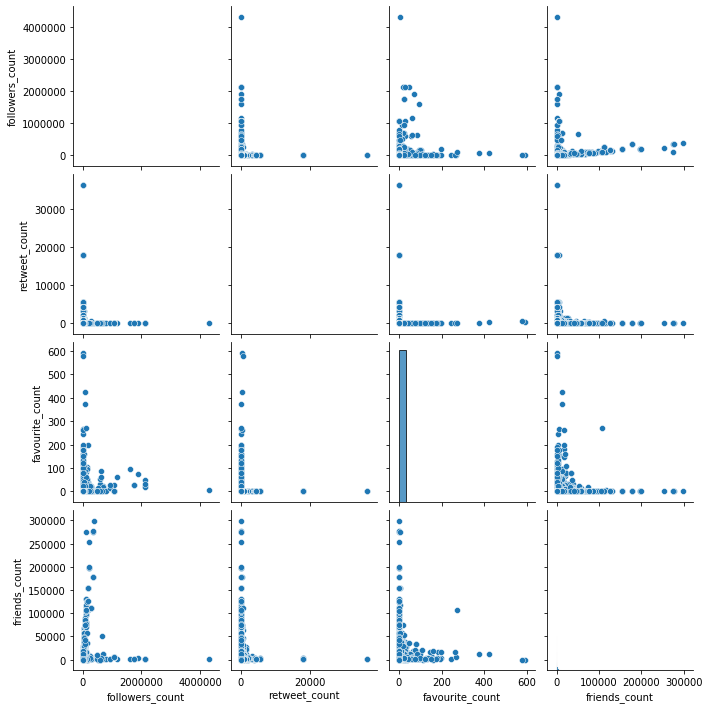

In [24]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

### Wer hat am meisten favourits?

In [29]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour.head()

user_id                    user_name  followers_count  \
37241  1345740574977007616             Humanity Warrior             1737   
31954   820027394148941826                80sThen80sNow           118997   
5834              19349934                  Del Sneddon             6734   
16788            353578611                  M I S R E D           185686   
24719            244501370  Parita | vegan food blogger             7922   

       retweet_count  favourite_count  friends_count  
37241            607              578             11  
31954             21              273         106322  
5834              10              246           1898  
16788             14              198           3575  
24719             17              179           4161

In [30]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret.head()

user_id            user_name  followers_count  \
26930  1251726748489842688  ally misses harry 𓆈             1028   
26926  1355617650345451522                ally🤍             1287   
7731   1097452327739510785      🌳naturalkatsup🌳              117   
2552   1004149172944203778                Grace              638   
2801   1173997916463255553          dole Shakur              476   

       retweet_count  favourite_count  friends_count  
26930          36354                0           1298  
26926          36354                0           1508  
7731           18002                0            165  
2552           17821                0            546  
2801           17821                0            389

### Wer hat am meisten friends?¶

In [31]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends.head()

user_id            user_name  followers_count  retweet_count  \
18226  148418872    Chantel Martiromo           399377              0   
18227   39047949       Kyle J. Norton           356499              0   
3647   135348838  The Curable Recipes           364558              0   
19658  487308755             PizzaRev            99270              1   
15701  426723697              Scott ☘           229567              4   

       favourite_count  friends_count  
18226                2         299379  
18227                1         277367  
3647                 2         275645  
19658                4         275585  
15701                0         252492

## Auswertung RT

In [32]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

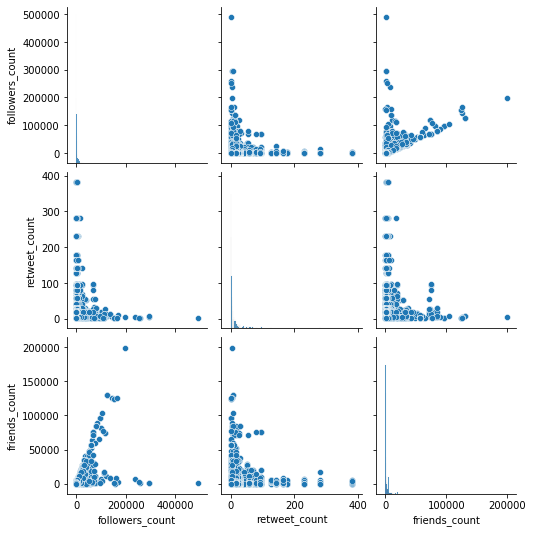

In [33]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:140

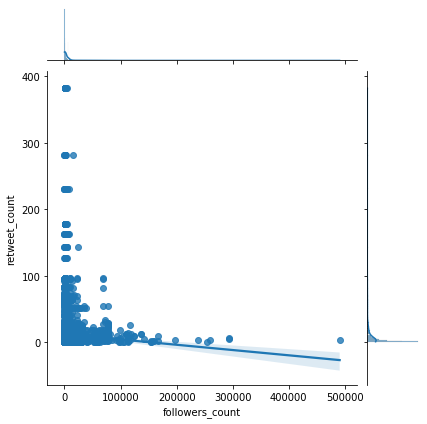

In [35]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:140

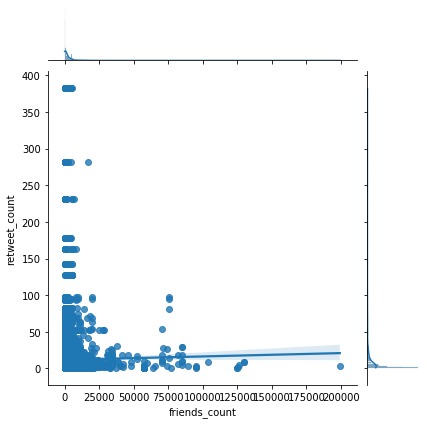

In [36]:
ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:140

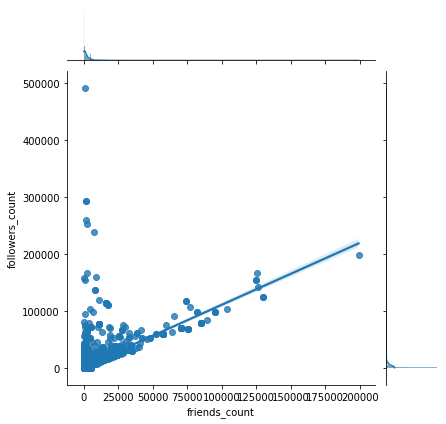

In [37]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg")

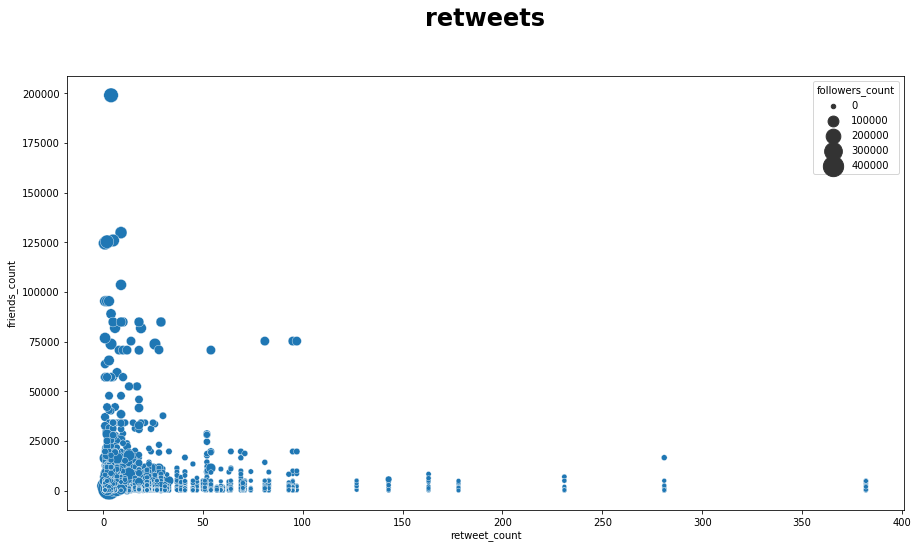

In [38]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [39]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x', 'followers_count_y','retweet_count_y','friends_count_y']]

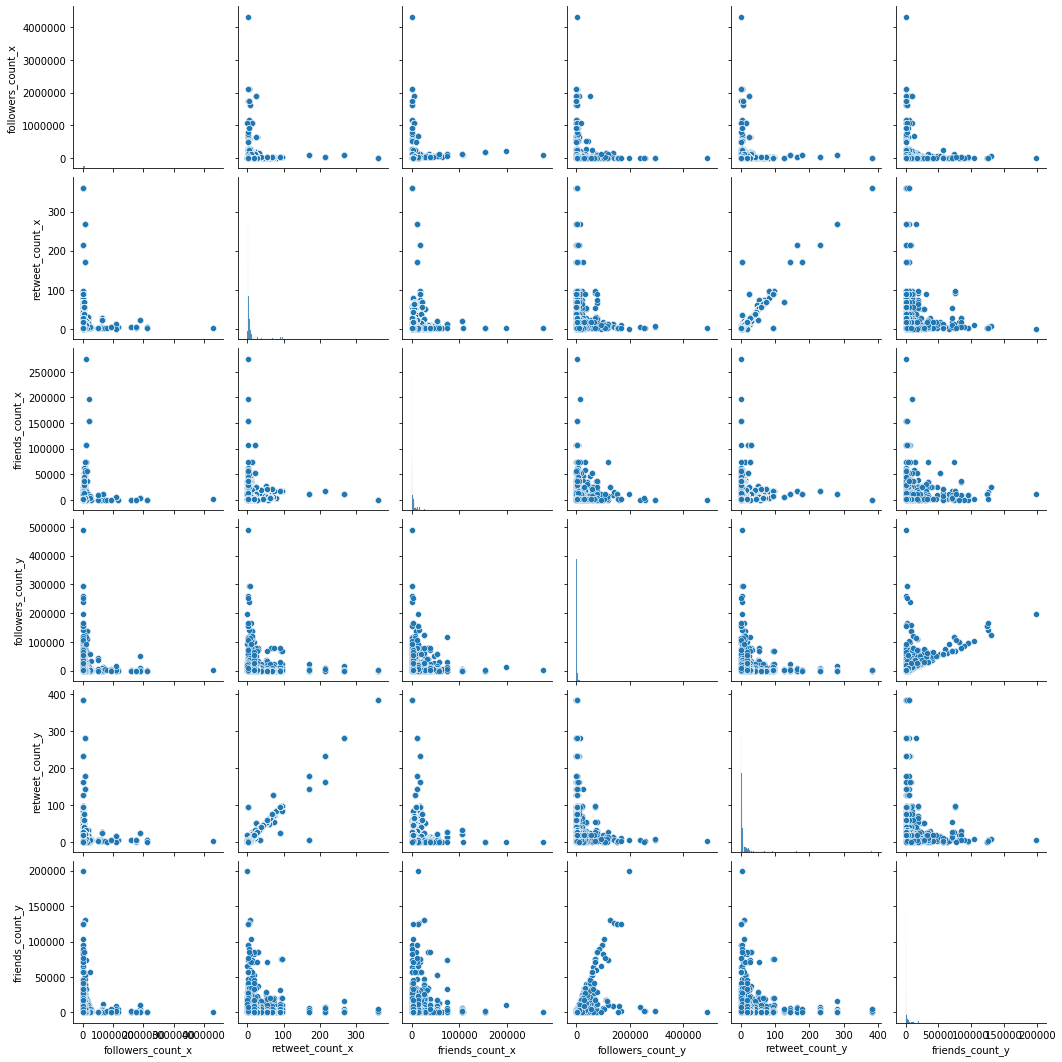

In [40]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)

## Networkx with Python

In [41]:
import networkx as nx
import warnings

In [42]:
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'creation_date_x', 'description_x',
       'entities_hashtags_x', 'favourite_count_x', 'followers_count_x',
       'friends_count_x', 'full_text_x', 'location_x', 'mentions_x',
       'profile_created_at_x', 'protected_x', 'retweet_count_x',
       'search_key_x', 'tweet_id_x', 'user_id_x', 'user_name_x',
       'user_screen_name_x', 'is_retweet_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y',
       'RT_of_ID', 'creation_date_y', 'description_y', 'entities_hashtags_y',
       'favourite_count_y', 'followers_count_y', 'friends_count_y',
       'full_text_y', 'location_y', 'mentions_y', 'profile_created_at_y',
       'protected_y', 'retweet_count_y', 'search_key_y', 'tweet_id_y',
       'user_id_y', 'user_name_y', 'user_screen_name_y', 'is_retweet_y'],
      dtype='object')

In [43]:
pd.DataFrame(df, columns=['user_id_x','retweet_count_x','user_id_y','retweet_count_y'])

user_id_x  retweet_count_x            user_id_y  \
0      1058161873349005312                2           3180931062   
1      1058161873349005312                2  1370468115402866691   
2      1351355454996140032                1            193239717   
3      1310085242636566529                1           3044872221   
4      1310085242636566529                1           3044872221   
...                    ...              ...                  ...   
11508            126744557               18             96242829   
11509            126744557               18             17878138   
11510            126744557               18            210612513   
11511            126744557               18   964860672462020608   
11512            126744557               18             20244675   

       retweet_count_y  
0                    2  
1                    2  
2                    1  
3                    1  
4                    1  
...                ...  
11508               18  
11509               18  
11510               18  
11511               18  
11512               18  

[11513 rows x 4 columns]

In [44]:
df.head(3)

Unnamed: 0_x  Unnamed: 0.1_x            creation_date_x  \
0            21              21  2021-04-01 01:57:12+00:00   
1            21              21  2021-04-01 01:57:12+00:00   
2            54              54  2021-04-01 01:44:51+00:00   

                                       description_x  \
0  LA based FPS and MMO Twitch Streamer with a ha...   
1  LA based FPS and MMO Twitch Streamer with a ha...   
2  A Logo Designer from Indonesia\r\n\r\nYou can ...   

                                 entities_hashtags_x  favourite_count_x  \
0  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   
1  ApexLegends, doggo, cam, apex, twitch, tiktok,...                  0   
2  logoforsale, logos, logoinspiration, chef, foo...                  0   

   followers_count_x  friends_count_x  \
0                148              193   
1                148              193   
2                 27               47   

                                         full_text_x       location_x  ...  \
0  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   
1  🔴LIVE - TWITCHH Y U TAKE MY JAMZZZ?!🔴\r\nhttps...  Los Angeles, CA  ...   
2  Running Chef Logo is available on @LogoGround ...              NaN  ...   

                  mentions_y       profile_created_at_y  protected_y  \
0               'ItsVanBaby'  2015-04-30 20:34:46+00:00        False   
1               'ItsVanBaby'  2021-03-12 20:15:31+00:00        False   
2  'Mohhative', 'LogoGround'  2010-09-21 10:09:49+00:00        False   

   retweet_count_y search_key_y           tweet_id_y            user_id_y  \
0                2        #food  1377440748329574400           3180931062   
1                2        #food  1377440166504202243  1370468115402866691   
2                1        #food  1377440164889305088            193239717   

        user_name_y user_screen_name_y  is_retweet_y  
0       Esports RTs     EsportsTweeter          True  
1  The ROM's Monkey         romsmonkey          True  
2        bebas neue           _sanz24_          True  

[3 rows x 41 columns]

In [45]:
source = 'user_screen_name_x'
target = 'user_screen_name_y'

In [46]:
#G = nx.from_pandas_edgelist(df, source=source, target=target, edge_attr=['user_name_x','location_x','retweet_count_x','description_x','followers_count_x','friends_count_x'])
#nx.draw(G, with_labels=False)
#plt.show()

In [47]:
G = nx.from_pandas_edgelist(df, source=source, target=target, edge_attr='followers_count_y')
#nx.draw(G, with_labels=False)
#plt.show()

In [48]:
type(G)

networkx.classes.graph.Graph

In [49]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 7216\nNumber of edges: 7682\nAverage degree:   2.1292'

In [57]:
print(list(G.nodes(data=True))[0:10])

[('ItsVanBaby', {}), ('EsportsTweeter', {}), ('romsmonkey', {}), ('Mohhative', {}), ('_sanz24_', {}), ('HapiVegies', {}), ('VeganGoodness', {}), ('Livetradingnews', {}), ('alwaysbeyoufit', {}), ('GOSSIPH0LLYWOOD', {})]


In [58]:
len(G.nodes())

7216

### * Edges

In [62]:
print(list(G.edges(data=True))[0:10])

[('ItsVanBaby', 'EsportsTweeter', {'followers_count_y': 3552}), ('ItsVanBaby', 'romsmonkey', {'followers_count_y': 241}), ('Mohhative', '_sanz24_', {'followers_count_y': 227}), ('HapiVegies', 'VeganGoodness', {'followers_count_y': 3571}), ('HapiVegies', 'vague050', {'followers_count_y': 1152}), ('VeganGoodness', 'AttachmentMumma', {'followers_count_y': 3572}), ('Livetradingnews', 'alwaysbeyoufit', {'followers_count_y': 64}), ('Livetradingnews', 'GOSSIPH0LLYWOOD', {'followers_count_y': 3365}), ('Livetradingnews', 'MiamiBikiniShop', {'followers_count_y': 774}), ('alwaysbeyoufit', 'intajuicegco', {'followers_count_y': 71})]


In [63]:
len(G.edges())

7682

### * Visualization

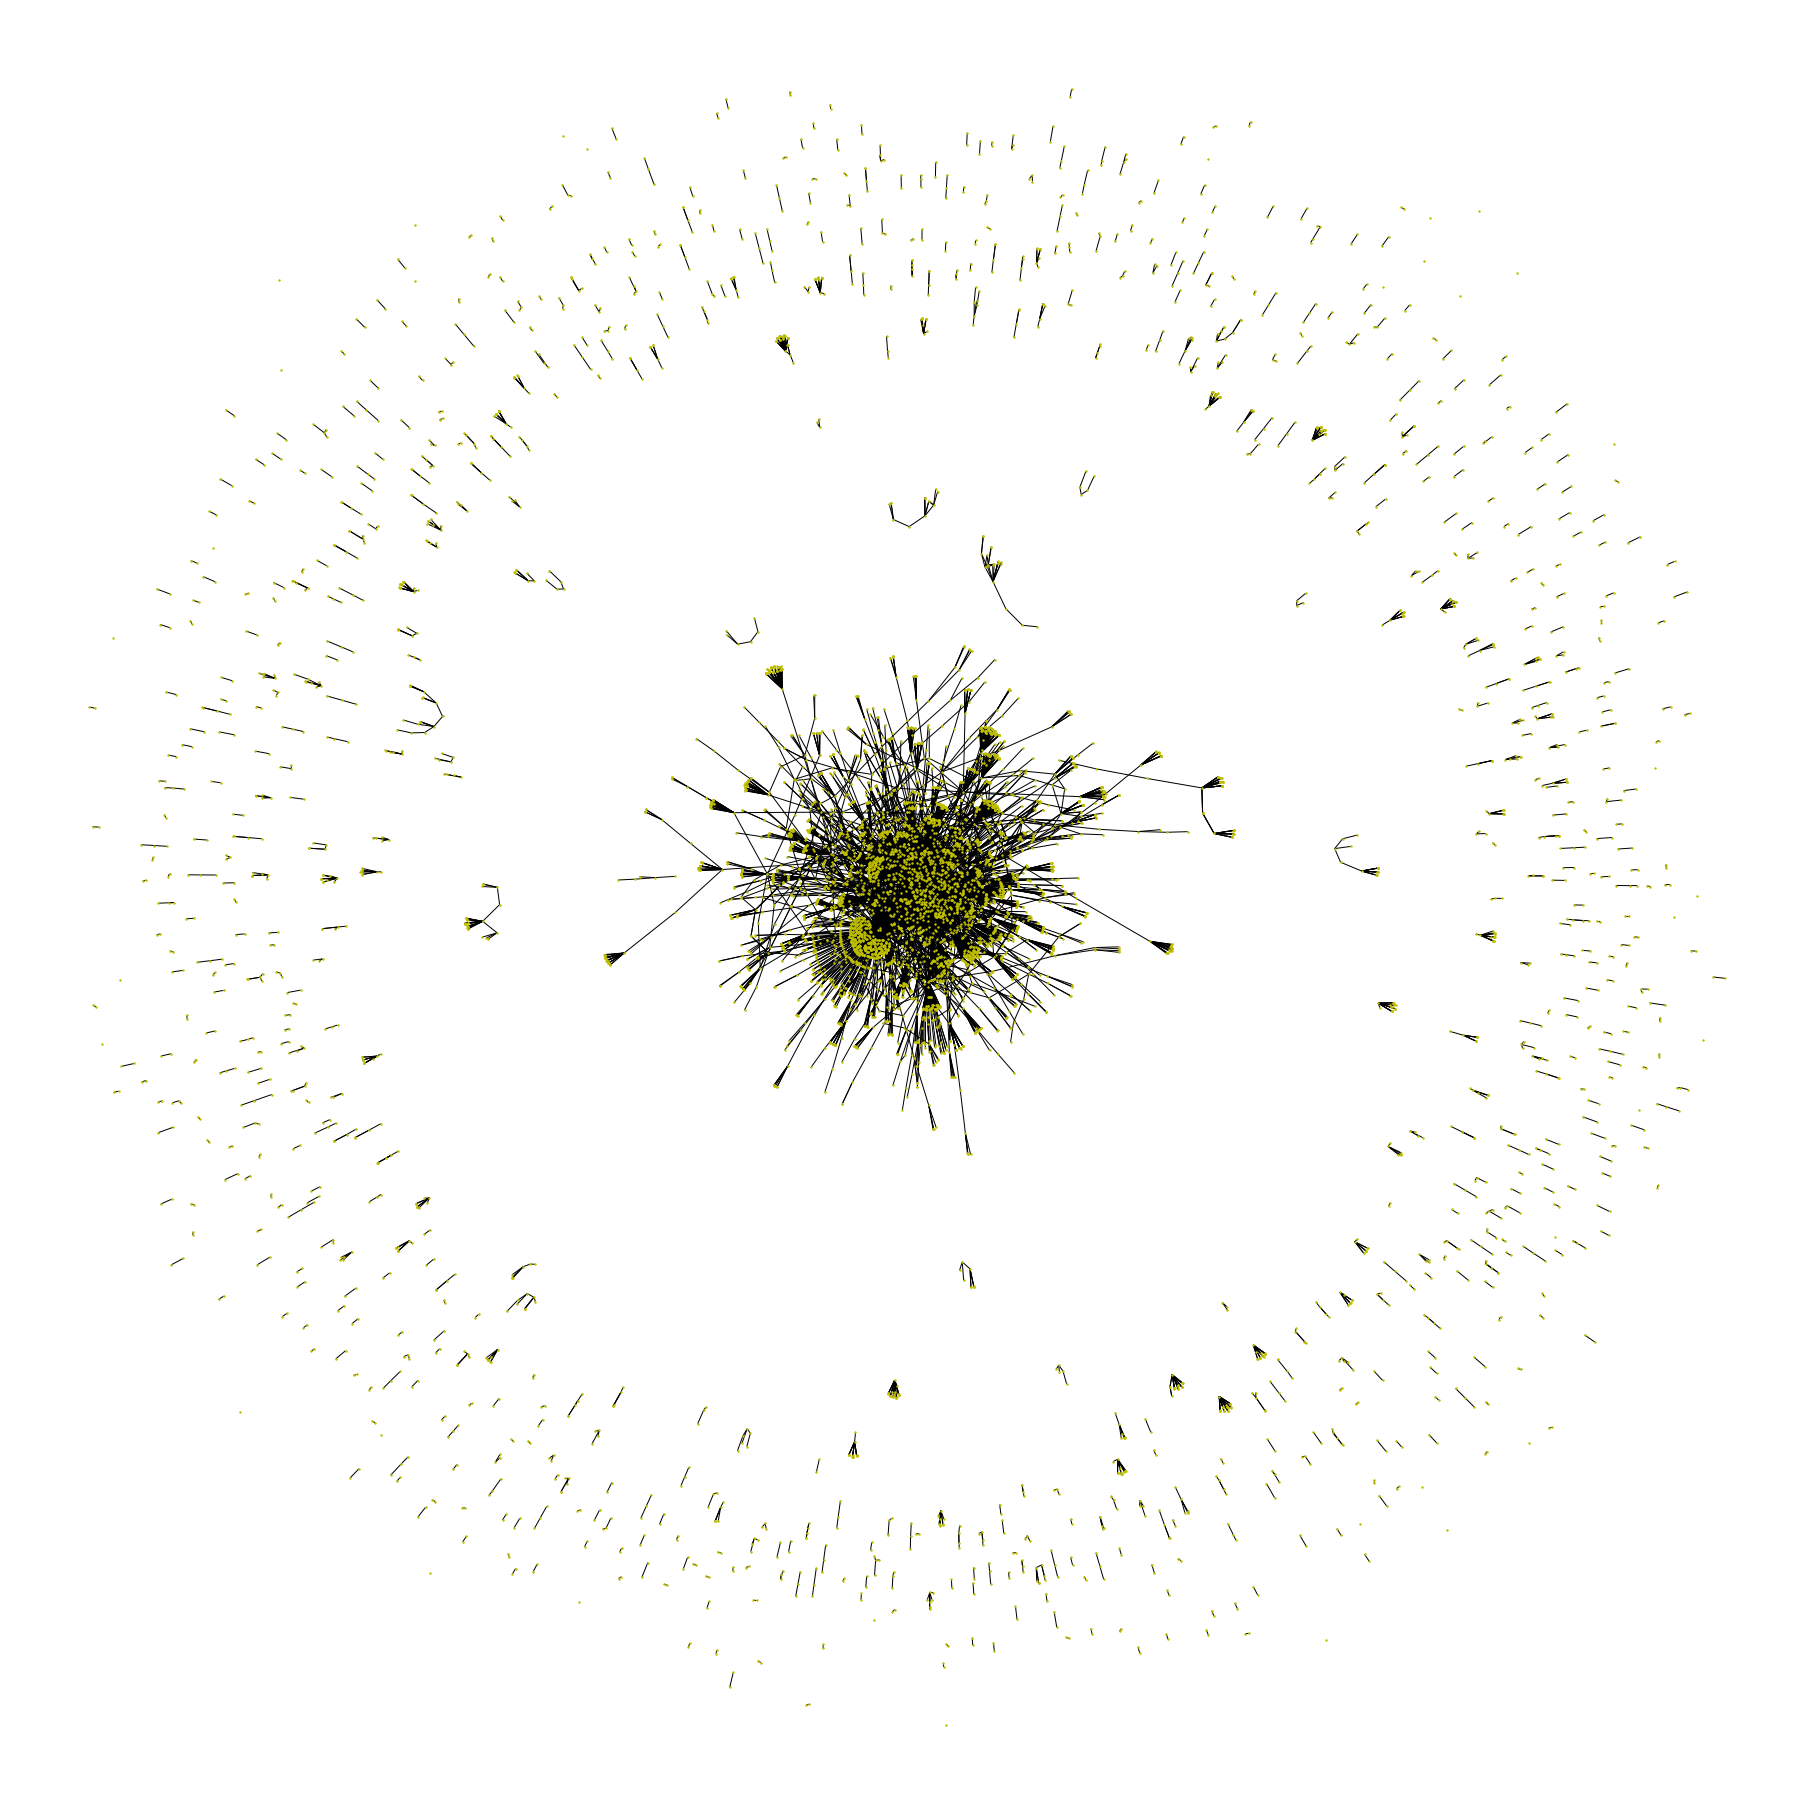

In [64]:
plt.figure(figsize=(25,25))
nx.draw(G, with_labels=False, node_color='y', node_size=2)
plt.show()

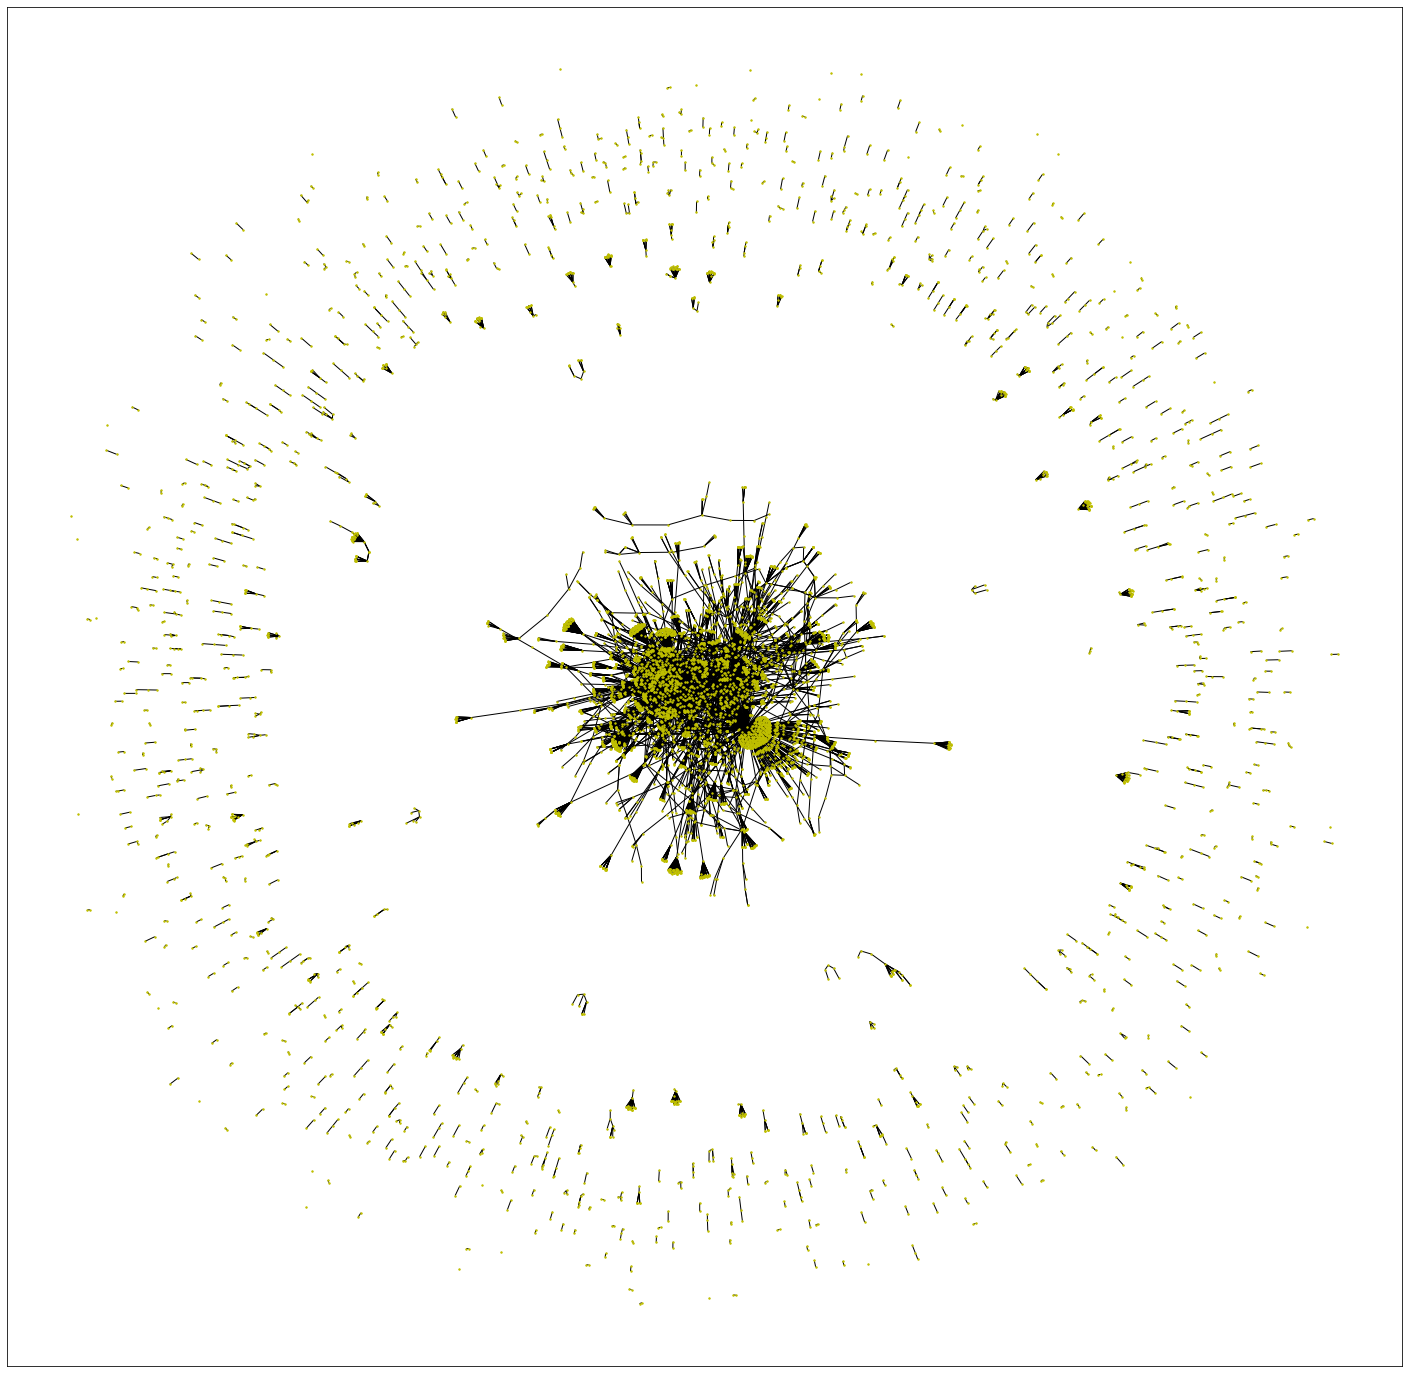

In [65]:
# Visualization with nx.draw_networkx
plt.figure(figsize=(25,25))
nx.draw_networkx(G, with_labels=False, node_color='y', node_size=2)
plt.show()

### * Analysis
* Degree of centrality
* Influencer
* Most important conection
* Best betweener
* Shortest path

In [67]:
nx.degree(G, 'peta')

13

In [76]:
pd.DataFrame(data=nx.degree(G)).sort_values(by=1, ascending=False)

0    1
72        researchmrx  658
313   Ivy_MiddletonUK  146
940   _AnimalAdvocate  125
533         VeganPoet   99
12       vanprobindia   99
...               ...  ...
2933   jared_levenson    1
2932      BitrichInfo    1
2931      IndieDev_RT    1
2929  youkainoshitake    1
7215       Skelextorr    1

[7216 rows x 2 columns]

### * Degree centrality

In [81]:
import itertools
dc = nx.degree_centrality(G)
dict(itertools.islice(dc.items(), 10))

{'ItsVanBaby': 0.0002772002772002772,
 'EsportsTweeter': 0.0001386001386001386,
 'romsmonkey': 0.0001386001386001386,
 'Mohhative': 0.0001386001386001386,
 '_sanz24_': 0.0001386001386001386,
 'HapiVegies': 0.0002772002772002772,
 'VeganGoodness': 0.0002772002772002772,
 'Livetradingnews': 0.00041580041580041577,
 'alwaysbeyoufit': 0.0005544005544005544,
 'GOSSIPH0LLYWOOD': 0.0001386001386001386}

In [83]:
#sorted(nx.degree_centrality(G).values(), reverse=True)

In [91]:
most_i = nx.degree_centrality(G)
most_influential = dict(itertools.islice(most_i.items(), 10))
for id_tw in sorted(most_influential, key=most_influential.get, reverse=True):
    print('Influencer: ', id_tw, ' -> Centrality: ', most_influential[id_tw])

Influencer:  alwaysbeyoufit  -> Centrality:  0.0005544005544005544
Influencer:  Livetradingnews  -> Centrality:  0.00041580041580041577
Influencer:  ItsVanBaby  -> Centrality:  0.0002772002772002772
Influencer:  HapiVegies  -> Centrality:  0.0002772002772002772
Influencer:  VeganGoodness  -> Centrality:  0.0002772002772002772
Influencer:  EsportsTweeter  -> Centrality:  0.0001386001386001386
Influencer:  romsmonkey  -> Centrality:  0.0001386001386001386
Influencer:  Mohhative  -> Centrality:  0.0001386001386001386
Influencer:  _sanz24_  -> Centrality:  0.0001386001386001386
Influencer:  GOSSIPH0LLYWOOD  -> Centrality:  0.0001386001386001386


In [92]:
pd.DataFrame.from_dict(data=nx.degree_centrality(G), orient='index').sort_values(by=0, ascending=False)

0
researchmrx      0.091199
Ivy_MiddletonUK  0.020236
_AnimalAdvocate  0.017325
VeganPoet        0.013721
vanprobindia     0.013721
...                   ...
jared_levenson   0.000139
BitrichInfo      0.000139
IndieDev_RT      0.000139
youkainoshitake  0.000139
Skelextorr       0.000139

[7216 rows x 1 columns]

### * Eigenvector centrality

In [107]:
## Most importat conection
ev = nx.eigenvector_centrality_numpy(G, max_iter=20)
dict(itertools.islice(ev.items(), 10))

{'ItsVanBaby': 1.0208463168041495e-18,
 'EsportsTweeter': -2.193021939774846e-19,
 'romsmonkey': -1.7528984047608792e-19,
 'Mohhative': -3.526578385899329e-19,
 '_sanz24_': 1.394347420683123e-19,
 'HapiVegies': 0.0009074774001650854,
 'VeganGoodness': 0.0011015747378849442,
 'Livetradingnews': 4.2101308509961713e-05,
 'alwaysbeyoufit': 0.0010831078894134774,
 'GOSSIPH0LLYWOOD': 1.631597346599482e-06}

In [113]:
most_impor_conection = dict(itertools.islice(ev.items(),20))
type(most_impor_conection)

dict

In [114]:
for id_tw in sorted(most_impor_conection, key=most_impor_conection.get, reverse=True):
    print('Connector', id_tw, ' -> Connection', most_impor_conection[id_tw])

Connector vanprobindia  -> Connection 0.010797160671754931
Connector VeganGoodness  -> Connection 0.0011015747378849442
Connector alwaysbeyoufit  -> Connection 0.0010831078894134774
Connector HapiVegies  -> Connection 0.0009074774001650854
Connector OldFashRecipes  -> Connection 0.0006052270213130154
Connector lorene1voice  -> Connection 0.0004190633769873137
Connector VideoGameCream  -> Connection 0.0004190633769873127
Connector GeogResearch  -> Connection 0.00041843399472194285
Connector Livetradingnews  -> Connection 4.2101308509961713e-05
Connector MoestuinMoments  -> Connection 1.6240414327925065e-05
Connector GamingRTweeters  -> Connection 1.6240414327925004e-05
Connector MiamiBikiniShop  -> Connection 1.6315973465995018e-06
Connector GOSSIPH0LLYWOOD  -> Connection 1.631597346599482e-06
Connector mherrera68  -> Connection 1.0266399064004365e-18
Connector ItsVanBaby  -> Connection 1.0208463168041495e-18
Connector _sanz24_  -> Connection 1.394347420683123e-19
Connector romsmonkey  

In [116]:
pd.DataFrame.from_dict(data=nx.eigenvector_centrality_numpy(G), orient='index').sort_values(by=0, ascending=False)

0
researchmrx      7.030317e-01
Dragofix         3.530960e-02
FabFudge_UK      3.443148e-02
VegNews          3.382816e-02
organicdishes    3.184335e-02
...                       ...
anadoluagency   -5.271506e-18
All_Things_New_ -5.588231e-18
DoorDas93195685 -5.677424e-18
Tsweetmap       -6.047340e-18
_atanas_        -1.118703e-17

[7216 rows x 1 columns]

### * Shortest Path

In [117]:
## Shortest Path
nx.shortest_path(G, 'peta', 'VeganPoet')

['peta', 'ChristineJameis', 'VeganPoet']

In [118]:
def path(graph, a, b):
    try: return(nx.shortest_path(graph, a, b))
    except: return('no path between')

In [119]:
graph = G
a = 'peta'
b = 'AllegraHarvey16'
path(graph, a, b)

'no path between'

### * Betweener centrality

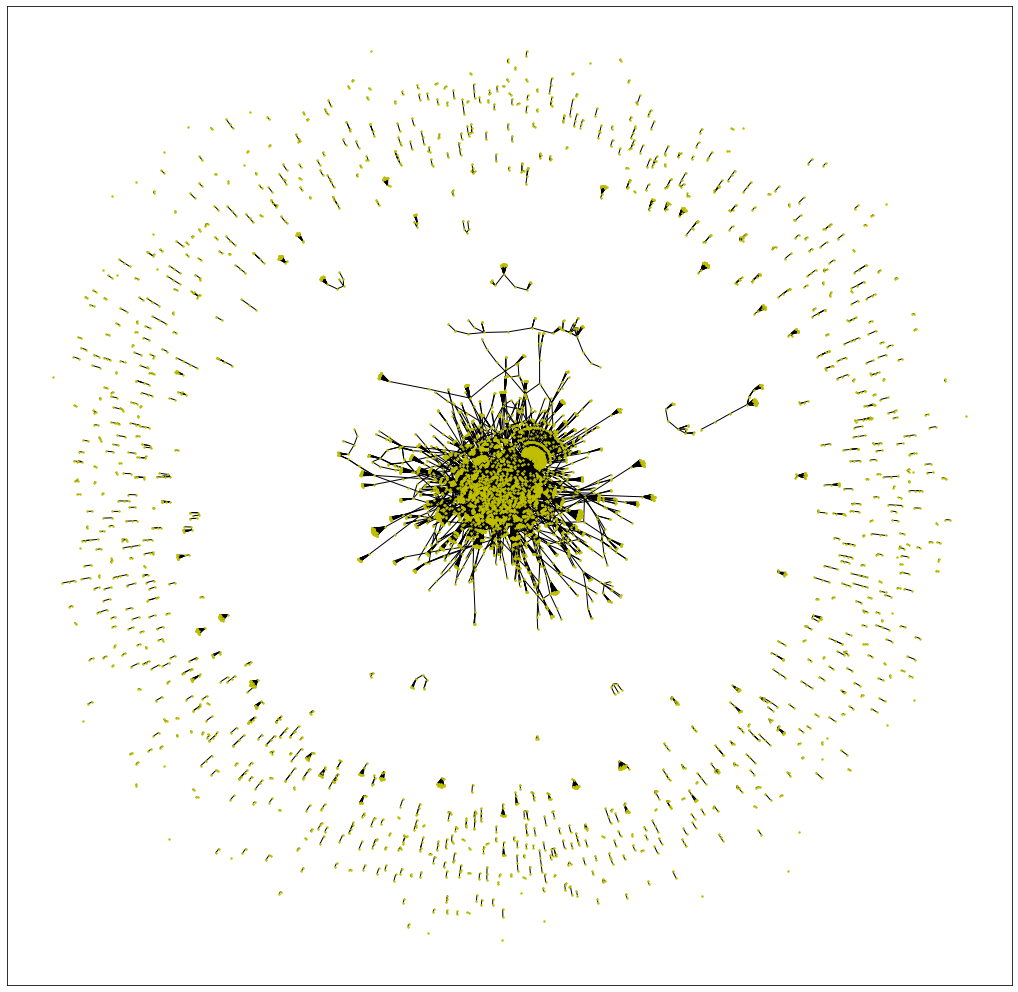

In [103]:
## Betweener Centrality
plt.figure(figsize=(18,18))
nx.draw_networkx(G, with_labels=False, node_color='y', node_size=2)
plt.show()

In [125]:
best_c = nx.betweenness_centrality(G)
best_connector = dict(itertools.islice(best_c.items(),20))
for id_tw in sorted(best_connector, key=best_connector.get, reverse=True):
    print('Best Connector: ', id_tw, ' -> Betweenes', best_connector[id_tw])

Best Connector:  vanprobindia  -> Betweenes 0.05038937214840102
Best Connector:  OldFashRecipes  -> Betweenes 0.005333556545712033
Best Connector:  alwaysbeyoufit  -> Betweenes 0.0007833740756734501
Best Connector:  Livetradingnews  -> Betweenes 0.0003511690231956381
Best Connector:  lorene1voice  -> Betweenes 0.00017560372425911655
Best Connector:  VideoGameCream  -> Betweenes 0.00017560372425911655
Best Connector:  HapiVegies  -> Betweenes 1.3991210627174314e-05
Best Connector:  VeganGoodness  -> Betweenes 8.700089340627949e-06
Best Connector:  ItsVanBaby  -> Betweenes 3.842532259499268e-08
Best Connector:  EsportsTweeter  -> Betweenes 0.0
Best Connector:  romsmonkey  -> Betweenes 0.0
Best Connector:  Mohhative  -> Betweenes 0.0
Best Connector:  _sanz24_  -> Betweenes 0.0
Best Connector:  GOSSIPH0LLYWOOD  -> Betweenes 0.0
Best Connector:  MiamiBikiniShop  -> Betweenes 0.0
Best Connector:  MoestuinMoments  -> Betweenes 0.0
Best Connector:  mherrera68  -> Betweenes 0.0
Best Connector: 

In [121]:
pd.DataFrame.from_dict(data=nx.betweenness_centrality(G), orient='index').sort_values(by=0, ascending=False)

0
researchmrx    0.234872
Dragofix       0.062575
vanprobindia   0.050389
natisthecure3  0.044055
VeganPoet      0.028617
...                 ...
17_trixxxxyy   0.000000
RecklessArepa  0.000000
52Mango52      0.000000
kevinbazan     0.000000
Skelextorr     0.000000

[7216 rows x 1 columns]

### Sub-groups

In [126]:
group1 = nx.bfs_tree(G, 'peta')

In [127]:
group2 = nx.bfs_tree(G, 'TheVeganSociety')

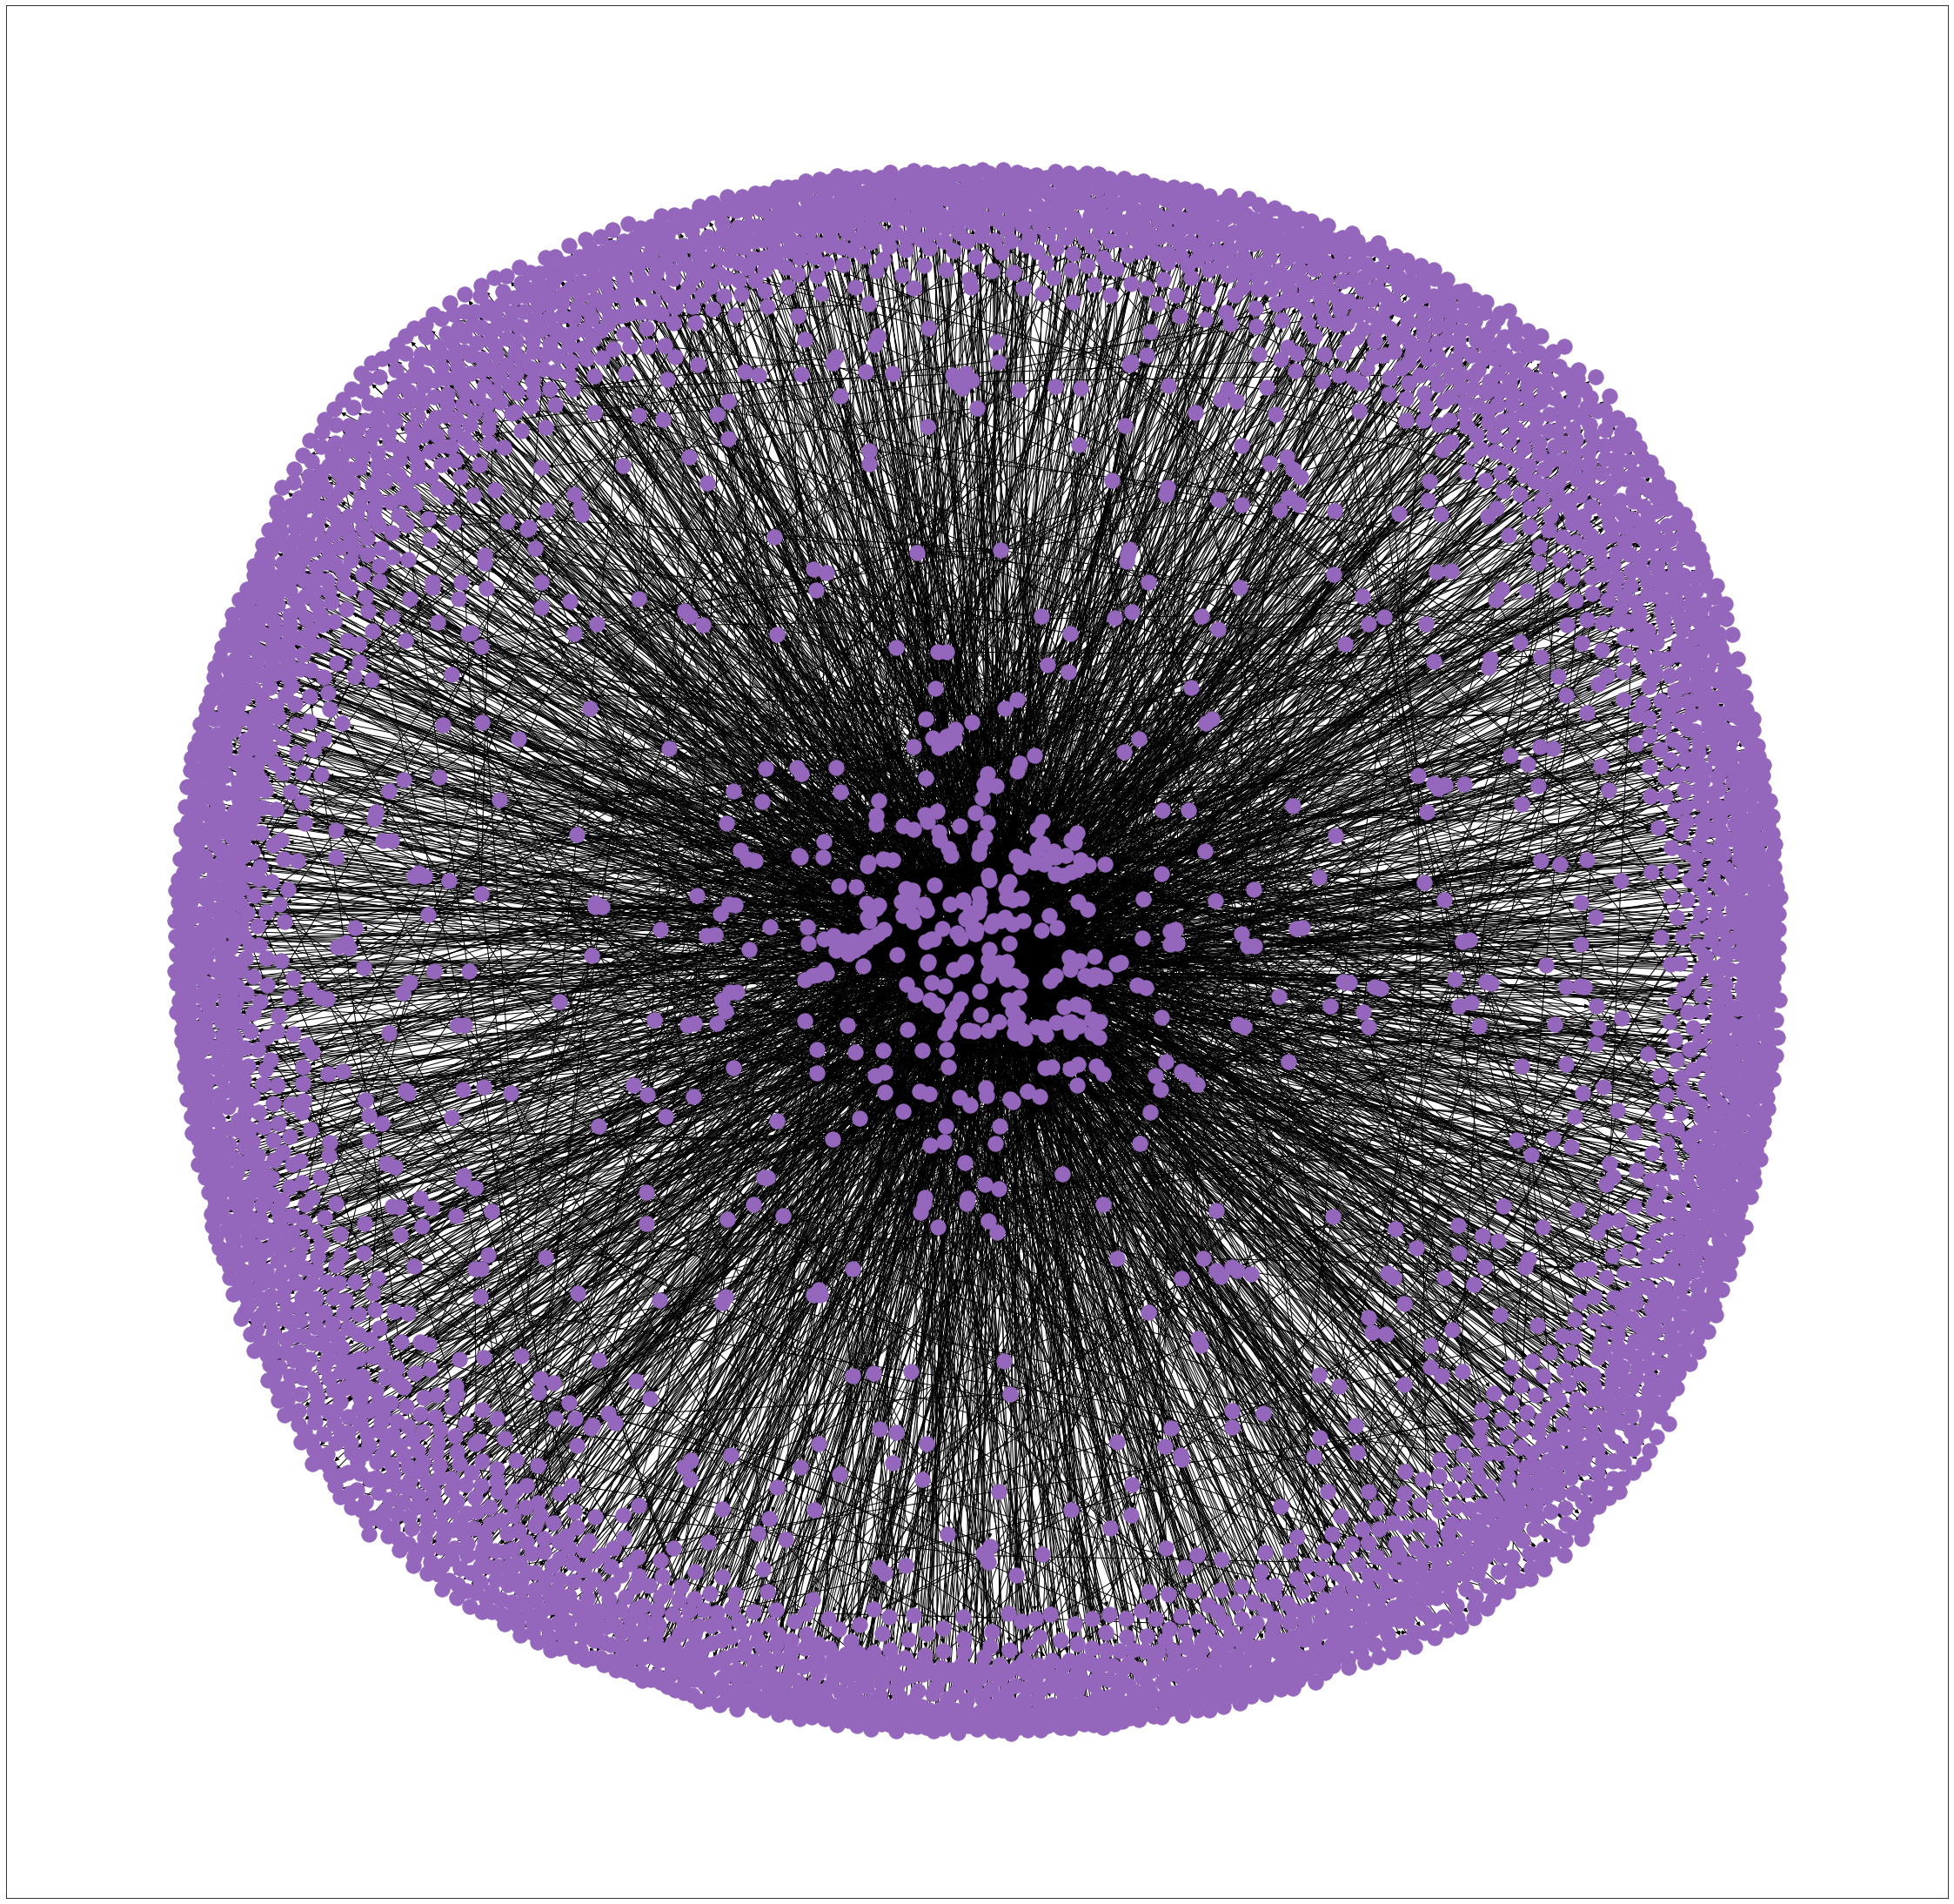

In [129]:
group = group2
plt.figure(figsize=(40,40))
nx.draw_networkx(group, with_labels=False, node_color='tab:purple')
plt.show()

In [140]:
len(nx.node_connected_component(G,"peta"))

4572

In [141]:
edges = df[['user_name_x', 'user_name_y', 'followers_count_y']]
edges

user_name_x       user_name_y  followers_count_y
0         ItsVanBaby       Esports RTs               3552
1         ItsVanBaby  The ROM's Monkey                241
2      Mohha / Haris        bebas neue                227
3        Hapi Vegies    Vegan Goodness               3568
4        Hapi Vegies    Vegan Goodness               3571
...              ...               ...                ...
11508    Wanda Lopez            Zulily              53051
11509    Wanda Lopez            Brandy              26518
11510    Wanda Lopez     Gladys Parker               2691
11511    Wanda Lopez               ELC               1104
11512    Wanda Lopez        Lex "eDad"               3066

[11513 rows x 3 columns]

In [142]:
user_y = 'MRX'
edges.loc[edges['user_name_y']==user_y]

user_name_x user_name_y  \
59                                       Streaming Sales         MRX   
117                                           Tasteville         MRX   
200                                      margareteubanks         MRX   
226                                   Totally Vegan Buzz         MRX   
249                                   Totally Vegan Buzz         MRX   
...                                                  ...         ...   
11281                              Vegan Food and Living         MRX   
11309                                    Veggie Inspired         MRX   
11317  FriFran: GF Vegan Allium-Free Coconut-Free + More         MRX   
11481                                       Vitacost.com         MRX   
11491                               Hannah Hossack-Lodge         MRX   

       followers_count_y  
59                  7053  
117                 7053  
200                 7049  
226                 7049  
249                 7049  
...                  ...  
11281               7087  
11309               7100  
11317               7100  
11481               7101  
11491               7104  

[1151 rows x 3 columns]

In [143]:
edges = df[['user_name_x', 'user_name_y', 'followers_count_y']]
edges_group = edges.groupby('user_name_x')['user_name_y'].count().sort_values(ascending=False)
edges_group

user_name_x
IⓋY #Animalrights🌱🐽🐾🦋🌊                                274
Organic Dishes | Tasty & Healthy Recipes | 🇨🇦 | 🇮🇳    202
Dragofix                                              175
#FabFudge                                             137
ANIMAL ADVOCATE  Ⓥ                                    131
                                                     ... 
Lachlan Main                                            1
La RosaWorks Sicily Tours & Travel                      1
La Cucina Italiana USA                                  1
LW PETITE BOUTIQUE, LLC                                 1
🧶 The Kitsch Cat 💙🐾                                     1
Name: user_name_y, Length: 2440, dtype: int64

In [152]:
followers = nx.get_edge_attributes(G, 'followers_count_y')
dict(itertools.islice(followers.items(),10))

{('ItsVanBaby', 'EsportsTweeter'): 3552,
 ('ItsVanBaby', 'romsmonkey'): 241,
 ('Mohhative', '_sanz24_'): 227,
 ('HapiVegies', 'VeganGoodness'): 3571,
 ('HapiVegies', 'vague050'): 1152,
 ('VeganGoodness', 'AttachmentMumma'): 3572,
 ('Livetradingnews', 'alwaysbeyoufit'): 64,
 ('Livetradingnews', 'GOSSIPH0LLYWOOD'): 3365,
 ('Livetradingnews', 'MiamiBikiniShop'): 774,
 ('alwaysbeyoufit', 'intajuicegco'): 71}

In [153]:
#print(f"Number of Nodes: {G.number_of_nodes()}")
#print(*G.nodes(data=True), sep="\n")

In [154]:
#print(f"Number of Edges: {G.number_of_edges()}")
#print(*G.edges(data=False), sep="\n")

In [148]:
# Information about one Node
nx.info(G, 'peta')

'Node peta has the following properties:\nDegree: 13\nNeighbors: Neathmywings Stewarthanson18 parrythehoot robocopmaximus birdtrees ChristineJameis soapbox62 BsonmezI Giovannaconfal6 castle_of_light MainStPlayboy gracielasomma AbigailVisagie_'

In [156]:
# Information between two Nodes/Edges
#G.edges['peta', 'AllegraHarvey16']

In [151]:
G.neighbors('peta')

### * Many Attributes Analyse (von Gephi exportiert)

In [5]:
df_many = pd.read_csv('many_attributes_vongephi.csv')
df_many.head(3)

Id        Label  timeset       0    1      2  indegree  outdegree  \
0  ReAnimetron  ReAnimetron      NaN  5064.0  1.0  115.0         0          1   
1   Jenna_Blum   Jenna_Blum      NaN  6090.0  1.0    0.0         0          2   
2    tbevents_    tbevents_      NaN   822.0  1.0    0.0         2          1   

   Degree  eigencentrality  Eccentricity  closnesscentrality  \
0       1         0.000000             1                 1.0   
1       2         0.000000             1                 1.0   
2       3         0.003198             1                 1.0   

   harmonicclosnesscentrality  betweenesscentrality  
0                         1.0                   0.0  
1                         1.0                   0.0  
2                         1.0                   2.0

In [8]:
# Rename columns
df_many.rename(columns={'0':'followers', '1':'user_activity','2':'retweets'}, inplace=True)
df_many.head(3)

Id        Label  timeset  followers  user_activity  retweets  \
0  ReAnimetron  ReAnimetron      NaN     5064.0            1.0     115.0   
1   Jenna_Blum   Jenna_Blum      NaN     6090.0            1.0       0.0   
2    tbevents_    tbevents_      NaN      822.0            1.0       0.0   

   indegree  outdegree  Degree  eigencentrality  Eccentricity  \
0         0          1       1         0.000000             1   
1         0          2       2         0.000000             1   
2         2          1       3         0.003198             1   

   closnesscentrality  harmonicclosnesscentrality  betweenesscentrality  
0                 1.0                         1.0                   0.0  
1                 1.0                         1.0                   0.0  
2                 1.0                         1.0                   2.0

In [34]:
# Quartil per column BSP. followers
followers = df_many[['followers']].sort_values('followers', ascending=False)
followers.dropna(inplace=True)
np.percentile(followers.dropna(),75)
np.quantile(followers,[0.25,0.50,0.75])

array([ 124.,  542., 2041.])

### Graphs in Gephi format

In [ ]:
network.add_edge()

### * Ein Network Graph neu erstellen

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
for c in df.columns:
    print(df[col])

In [ ]:
for i in df.index:
    print(i)

In [ ]:
network = nx.Graph(name='Twitter_Graph')

In [ ]:
for i in df.index:
    network.add_node(i,tweet_id_x=df['tweet_id_x'],location_x=df['location_x'],description_x=df['location_x'],followers_count_x=df['followers_count_x'])

In [ ]:
nx.write_gexf(G, "../eda/screen_name.gexf")